In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from src import schwefel
from src import baybe_utils
from src import visualization

import matplotlib.pyplot as plt

/home/brendenpelkie/miniconda3/envs/noisybo/lib/python3.12/site-packages/baybe/telemetry.py:222: UserWarning: WARNING: BayBE Telemetry endpoint https://public.telemetry.baybe.p.uptimize.merckgroup.com:4317 cannot be reached. Disabling telemetry. The exception encountered was: ConnectionError, HTTPConnectionPool(host='verkehrsnachrichten.merck.de', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f36f0dfd9a0>: Failed to resolve 'verkehrsnachrichten.merck.de' ([Errno -2] Name or service not known)"))
  warnings.warn(


## BayBE Schwefel function optimization examples

### Brenden Pelkie

This notebook walks through a quick grid search to explore the impact of measurement noise on optimization performance of a vanilla BO implementation in BayBE.

### 1. Pick parameters

First define parameters for optimization. Here we set the number of BO iterations/cycles to run, the number of random initial observations to include, the dimensionality of the schwefel function to optimize, the noise level of the schwefel observations, and the number of obserations to make per iteration/BO batch cycle

In [9]:
NUM_ITERATIONS = 15
NUM_INIT_OBS = 5
N_DIMS_SCHWEF = 2
NOISE_LEVEL_SCHWEF = 0
ITERATION_BATCH_SIZE = 1
SCHWEFEL_RANGE = (-50,50)

For the grid search over number of BO iterations and noise, select the desired values here

In [11]:
num_iterations = [5]#[5,10,20,40,60,80]
noise = [0]# [0, 0.1, 0.2, 0.5]


### 2. Run grid search

In [12]:
grid_results = baybe_utils.iteration_noise_grid_search(num_iterations, noise, NUM_INIT_OBS, N_DIMS_SCHWEF, ITERATION_BATCH_SIZE, SCHWEFEL_RANGE=SCHWEFEL_RANGE)

Beginning optimization campaign


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.17it/s]


### 3. Process and visualize results

In [13]:
n_its, noise, performance_matrix = baybe_utils.process_grid_searh_results(grid_results)

<Axes: xlabel='Noise level', ylabel='Number of BO iterations'>

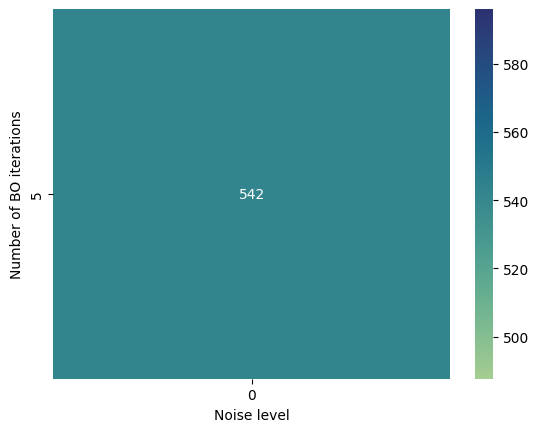

In [14]:
visualization.grid_search_heatmap(n_its, noise, performance_matrix)

In [15]:
test_result = grid_results['5']['0'].measurements

In [27]:
x_names = [f'schwefel{i+1}' for i in range(N_DIMS_SCHWEF)]

In [29]:
x_train = test_result[x_names].to_numpy()
y_train = test_result['schwefel'].to_numpy()

In [30]:
y_train

array([ 704.85928745,  555.62241542, 1314.4367682 ,  590.92000549,
        774.57368413, 1154.99341253, 1199.14411706,  583.68789976,
        541.86150018, 1195.2620041 ])

In [33]:
schwef = schwefel.SchwefelProblem(n_var = 2, noise_level = 0)

In [42]:
y_test = schwef.y(x_train)

In [46]:
x_train

array([[-353.1162661 , -115.77679551],
       [-100.48640485, -327.1966037 ],
       [ 139.7688944 , -438.20087406],
       [-486.63820259,  378.28871931],
       [-325.39646572, -219.090224  ],
       [-180.23321345,  500.        ],
       [ 500.        ,  500.        ],
       [-500.        , -104.2417874 ],
       [-132.38714138, -500.        ],
       [-448.33851406,   95.06174804]])

In [47]:
schwef.f(x_train)

array([ 704.85928745,  555.62241542, 1314.4367682 ,  590.92000549,
        774.57368413, 1154.99341253, 1199.14411706,  583.68789976,
        541.86150018, 1195.2620041 ])

In [48]:
schwef.y(x_train)

array([[ 704.85928745,  555.62241542, 1314.4367682 ,  590.92000549,
         774.57368413, 1154.99341253, 1199.14411706,  583.68789976,
         541.86150018, 1195.2620041 ],
       [ 704.85928745,  555.62241542, 1314.4367682 ,  590.92000549,
         774.57368413, 1154.99341253, 1199.14411706,  583.68789976,
         541.86150018, 1195.2620041 ],
       [ 704.85928745,  555.62241542, 1314.4367682 ,  590.92000549,
         774.57368413, 1154.99341253, 1199.14411706,  583.68789976,
         541.86150018, 1195.2620041 ],
       [ 704.85928745,  555.62241542, 1314.4367682 ,  590.92000549,
         774.57368413, 1154.99341253, 1199.14411706,  583.68789976,
         541.86150018, 1195.2620041 ],
       [ 704.85928745,  555.62241542, 1314.4367682 ,  590.92000549,
         774.57368413, 1154.99341253, 1199.14411706,  583.68789976,
         541.86150018, 1195.2620041 ],
       [ 704.85928745,  555.62241542, 1314.4367682 ,  590.92000549,
         774.57368413, 1154.99341253, 1199.14411706,  583

In [39]:
x_train

array([[-353.1162661 , -115.77679551],
       [-100.48640485, -327.1966037 ],
       [ 139.7688944 , -438.20087406],
       [-486.63820259,  378.28871931],
       [-325.39646572, -219.090224  ],
       [-180.23321345,  500.        ],
       [ 500.        ,  500.        ],
       [-500.        , -104.2417874 ],
       [-132.38714138, -500.        ],
       [-448.33851406,   95.06174804]])